#### Support Vector Machine - Model

In [68]:
#importing the libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [69]:
#Loading the transformed and standardized Data
data = pd.read_csv(r"C:\HOME\SJSU\Solar_Data\solar_data_transformed18.csv")

In [70]:
#Selecting the features and defining the target features
X = data.drop(columns=['InstallType', 'ID'])
y = data['InstallType']

PCA has not been applied (as it does not have high variance as per the dataset). One of the team member has explained it in Project_PCA_RF_DT_FeatureImportance.ipynb notebook.

In [71]:
#Splitting the data into Train and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
#Training the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [73]:
#predictions
y_pred = svm_model.predict(X_test)

In [74]:
#evaluation
accuracy = svm_model.score(X_test, y_test)
print(f"SVM Accuracy: {accuracy}")

#Confusion Matrix
print("\nConfusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred))

SVM Accuracy: 0.8697530864197531

Confusion Matrix for SVM:
 [[587  16  44]
 [ 21 367  28]
 [ 24  78 455]]


In [76]:
from sklearn.metrics import classification_report

class_mapping = {
    0: "Ground",
    1: "Parking",
    2: "Rooftop"
}

target_names = [class_mapping[label] for label in sorted(class_mapping.keys())]

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:

              precision    recall  f1-score   support

      Ground       0.93      0.91      0.92       647
     Parking       0.80      0.88      0.84       416
     Rooftop       0.86      0.82      0.84       557

    accuracy                           0.87      1620
   macro avg       0.86      0.87      0.86      1620
weighted avg       0.87      0.87      0.87      1620



#### Hyperparameter Tuning for Support Vector Machine

In [31]:
#Defining the Hyperparameter grid for SVM
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  #Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  #Kernel type
    'gamma': ['scale', 'auto']  #Kernel coefficient
}

grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [32]:
#Best parameters and model performance
svm_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [33]:
#Predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)

#### Model Evaluation: SVM

In [41]:
#accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9358024691358025


In [42]:
#precision
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}")

Precision: 0.9333333333333332


In [77]:
#Classification Report
from sklearn.metrics import classification_report

# Define a mapping for class names
class_mapping = {
    0: "Ground",
    1: "Parking",
    2: "Rooftop"
}

target_names = [class_mapping[label] for label in sorted(class_mapping.keys())]

print("\nClassification Report after Hyperparameter Tuning:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report after Hyperparameter Tuning:

              precision    recall  f1-score   support

      Ground       0.93      0.91      0.92       647
     Parking       0.80      0.88      0.84       416
     Rooftop       0.86      0.82      0.84       557

    accuracy                           0.87      1620
   macro avg       0.86      0.87      0.86      1620
weighted avg       0.87      0.87      0.87      1620



In [44]:
from sklearn.metrics import recall_score
print("\nRecall (Macro):", recall_score(y_test, y_pred, average='macro'))


Recall (Macro): 0.935448529489716


In [45]:
from sklearn.metrics import f1_score
print("\nF1-Score (Macro):", f1_score(y_test, y_pred, average='macro'))


F1-Score (Macro): 0.9343374331608669


In [46]:
from sklearn.metrics import matthews_corrcoef
print("\nMatthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))


Matthews Correlation Coefficient: 0.9023593807420789


In [47]:
from sklearn.metrics import jaccard_score
print("\nJaccard Score (Macro):", jaccard_score(y_test, y_pred, average='macro'))


Jaccard Score (Macro): 0.8769543904735811


In [48]:
from sklearn.metrics import balanced_accuracy_score
print("\nBalanced Accuracy:", balanced_accuracy_score(y_test, y_pred))


Balanced Accuracy: 0.935448529489716


In [51]:
from sklearn.metrics import log_loss

#probabilities for all classes
y_prob = svm_model.predict_proba(X_test)

#Passing the true labels explicitly
unique_classes = svm_model.classes_
print("Log Loss:", log_loss(y_test, y_prob, labels=unique_classes))

#y_prob = logistic_model.predict_proba(X_test)[:, 1]

Log Loss: 0.20869864452305215


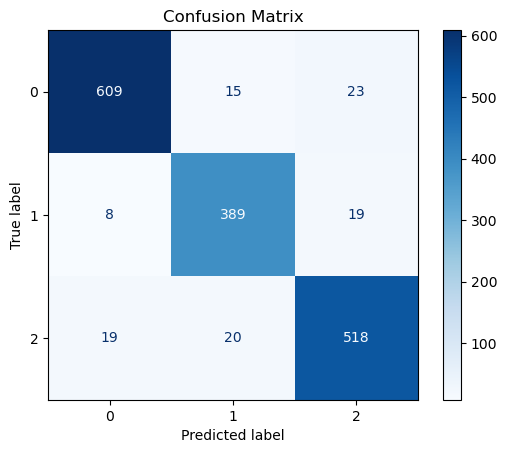

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
#Confusion matrix plot
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

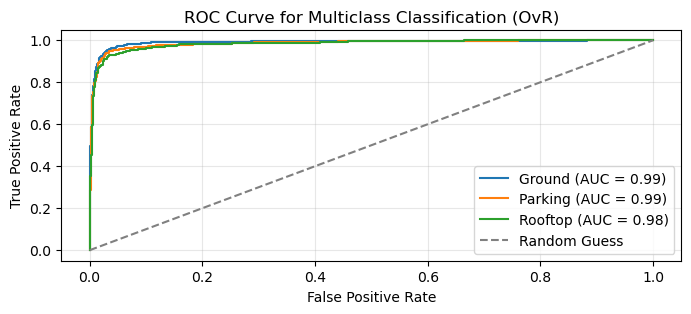

In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

#Define a mapping for class names
class_mapping = {
    0: "Ground",
    1: "Parking",
    2: "Rooftop"
}

#Ensuring classes are correctly labeled and binarized
n_classes = len(svm_model.classes_)
y_test_bin = label_binarize(y_test, classes=svm_model.classes_)

#Ensuring probabilities are available for all classes
y_prob = svm_model.predict_proba(X_test)

#Plotting the ROC Curve for each class
plt.figure(figsize=(8, 3))
for i, class_label in enumerate(svm_model.classes_):
    #Compute FPR and TPR
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i]) 
    roc_auc = auc(fpr, tpr)
    #Use custom class name in the legend
    class_name = class_mapping[class_label]
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

#Plotting the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")

#Customize the plot
plt.title("ROC Curve for Multiclass Classification (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

The ROC curve demonstrates the model's ability to distinguish between classes (Ground, Parking, Rooftop).The Area Under the Curve (AUC) values indicate excellent performance:
Ground: 0.99,
Parking: 0.99,
Rooftop: 0.98

In [55]:
from sklearn.metrics import roc_auc_score

#Getting the probabilities for all classes
y_prob = svm_model.predict_proba(X_test)  

#Use roc_auc_score with 'ovr' or 'ovo' for multiclass
print("ROC-AUC Score (OVR):", roc_auc_score(y_test, y_prob, multi_class='ovr'))
print("ROC-AUC Score (OVO):", roc_auc_score(y_test, y_prob, multi_class='ovo'))

ROC-AUC Score (OVR): 0.9858232186207001
ROC-AUC Score (OVO): 0.9851513328009167


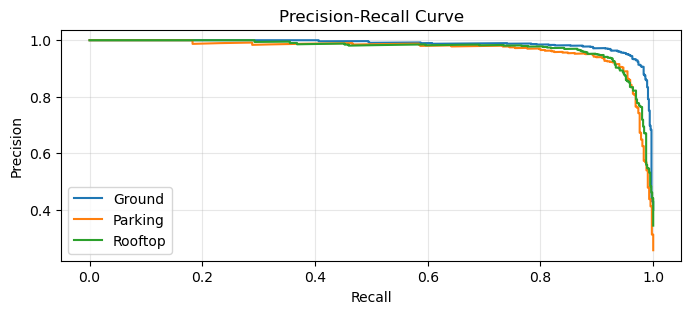

In [63]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

#Define a mapping for class names
class_mapping = {
    0: "Ground",
    1: "Parking",
    2: "Rooftop"
}

#Binarize the true labels
n_classes = len(np.unique(y_test))  
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)) 

#Confirm the shape of y_prob
y_prob = svm_model.predict_proba(X_test) 

#Plotting the Precision-Recall Curve for each class
plt.figure(figsize=(8, 3))
for i, class_label in enumerate(np.unique(y_test)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    class_name = class_mapping[class_label] 
    plt.plot(recall, precision, label=f"{class_name}")
    
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

The precision-recall curves for each class also reflect high precision and recall values, signifying minimal false positives and false negatives.

In [57]:
from sklearn.metrics import mean_absolute_error

#Assuming y_test and y_pred are available
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.0901


Key Insights:
1. Hyperparameter tuning greatly improved SVM's accuracy from 86.97% to 93.58%, thus showing the real capability of the model with proper tuning of parameters.
2. Hyperparameter tuning effectively optimized the decision boundaries leading to better generalization and higher classification performance.
3. Hence, the tuned SVM outperforms all other models in overall accuracy and reliability; thus, it is the best candidate for deployment.
4. However, targeted enhancements in classes such as Parking and Rooftop still have room for improvement in order to reduce false positives and false negatives.
5. Metrics like MCC (0.90) and Jaccard Score (0.88) highlight the SVM's strong correlation and overlap between predictions and true labels, indicating consistent performance across all classes.